**Image Compression using K_Means**

In this Task,we are given a RGB image which we have compress using K-means.

Using K-Means,we can cluster the pixels in an image into a smaller number of groups and then represent these groups by its mean color leading to itx compression(decrease in its size with much reduction in visual quality)

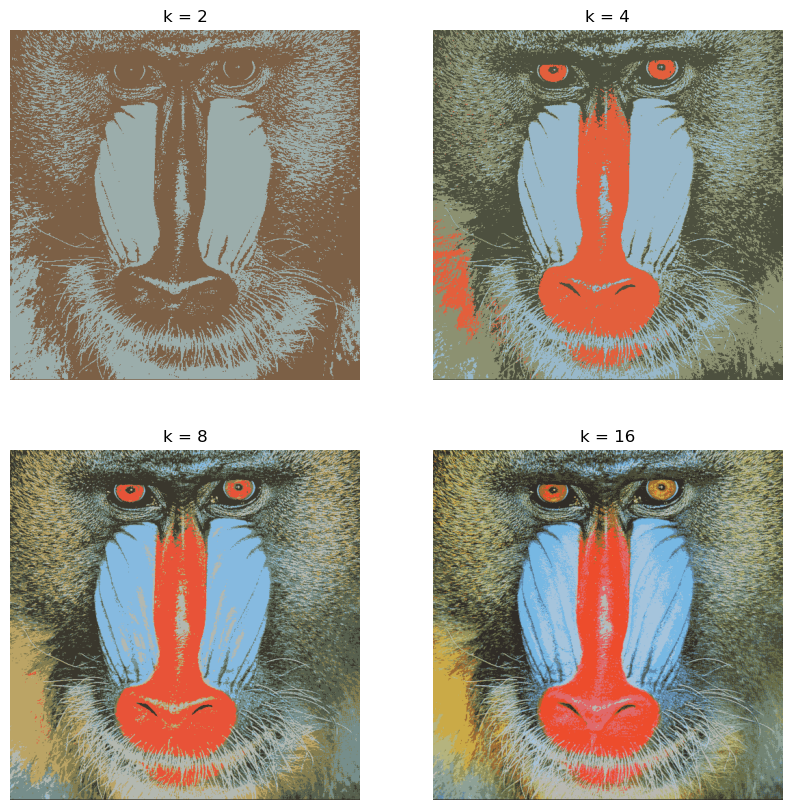

---------------------------------------------------------------------------------------------------


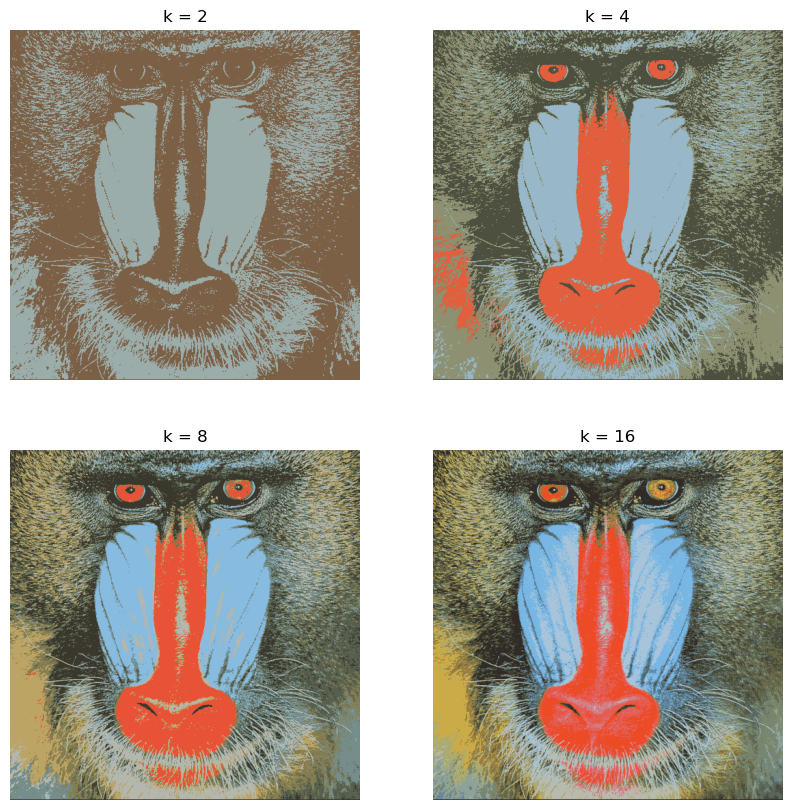

In [2]:
#importing required libraries and reading the image
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Task (a) and (b)
# computeCentroid, that takes n 3-dimensional features and returns their mean.
def computeCentroid(X):
    return np.mean(X, axis=0)

#mykmeans from scratch that takes data matrix X of size m×3 where m is the number of pixels in the image and the number of clusters k. It returns the cluster centers using the k-means algorithm.
def mykmeans(X, k, max_iter=100, tol=1e-6):
    m, n = X.shape

    # Initializing cluster centroids randomly
    centroids = X[np.random.choice(m, k, replace=False), :]

    for _ in range(max_iter):
        # Computing distances between data points and centroids
        distances = np.sqrt(((X[:, np.newaxis, :] - centroids) ** 2).sum(axis=-1))

        # Assigning data points to closest centroids
        cluster_assignments = np.argmin(distances, axis=1)

        # Updating centroids by taking the mean of assigned data points
        new_centroids = np.array([computeCentroid(X[cluster_assignments == i]) for i in range(k)])

        # Checking if centroids have converged
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids

#Task (c)
image_path ="C:\\Users\\soume\Downloads\\test.png"
# Reading the image using OpenCV
image = cv2.imread(image_path)
# Displaying the image
cv2.imshow("Image Window", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
img1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
cv2.imshow("Image RGB ", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Reshaping the image data to (m, 3) where m is the number of pixels
h, w, c = img1.shape
X = img1.reshape(-1, c)
#values of k
k_values = [2, 4, 8, 16]

# Compressing the image using k-means for different values of k
compressed_images = []
for k in k_values:
    centroids = mykmeans(X, k)
    compressed_image = centroids[np.argmin(np.sqrt(((X[:, np.newaxis, :] - centroids) ** 2).sum(axis=-1)), axis=1)]
    compressed_image = compressed_image.reshape(h, w, 3).astype(np.uint8)
    compressed_images.append(compressed_image)

# Displaying the compressed images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, (ax, compressed_image) in enumerate(zip(axs, compressed_images)):
    ax.imshow(compressed_image)
    ax.set_title(f'k = {k_values[i]}')
    ax.axis('off')

plt.show()
print('-------------------------------------------------------------------------------------------------------------')
#Task4
#compressing the image using ready made-kmeans from sklearn library
from sklearn.cluster import KMeans
# Checking if the image was loaded successfully
if image is not None:
    # Displaying the original image
    cv2.imshow("RGB_Image", img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Reshaping the image
    h, w, c = img1.shape
    X = img1.reshape(-1, c)

    #values of k
    k_values = [2, 4, 8, 16]

    # Compressing the image using scikit-learn k-means
    compressed_images = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
        compressed_image = kmeans.cluster_centers_[kmeans.labels_]
        compressed_image = compressed_image.reshape(h, w, c).astype(np.uint8)
        compressed_images.append(compressed_image)

    # Displaying the compressed images
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    for i, (ax, compressed_image) in enumerate(zip(axs, compressed_images)):
        ax.imshow(compressed_image)
        ax.set_title(f'k = {k_values[i]}')
        ax.axis('off')

    plt.show()
else:
    print("Failed to load the image.")


Incorporating spatial information or spatial coherence is an important aspect of image compression using k-means clustering. The idea is to consider not only the pixel values (colors) but also their spatial locations when assigning pixels to clusters. This helps to preserve local structures and reduce artifacts like color bleeding or noise in the compressed image.
By including spatial information in the clustering process, pixels that are spatially close to each other are more likely to be assigned to the same cluster, even if their pixel values are slightly different. This helps maintain spatial coherence and reduces artifacts in the compressed image.

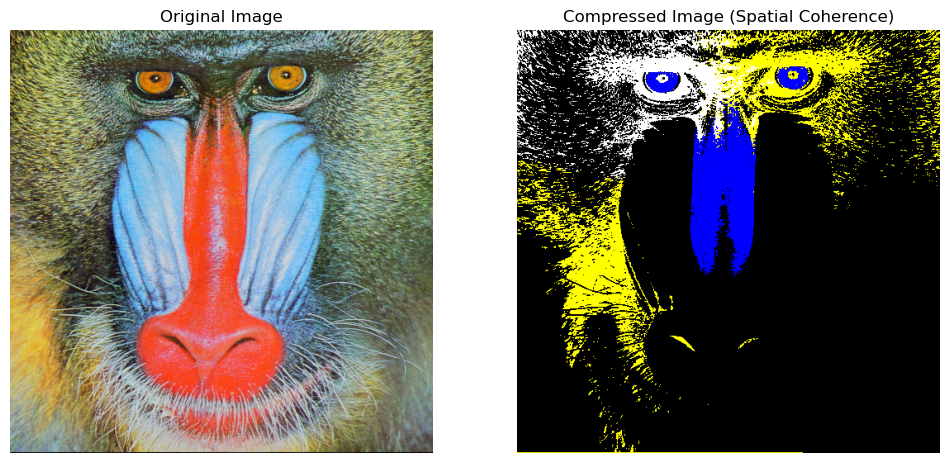

In [7]:
#Task(e)
#Spatial Coherence
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
#image was loaded successfully
if image is not None:
    #image dimensions
    h, w, _ = img1.shape

    # Reshape the image data to (m, 3) where m is the number of pixels
    X = img1.reshape(-1, 3)

    #spatial coordinates
    coords = np.column_stack(np.where(np.ones((h, w)) == 1))

    # Normalizing pixel values and spatial coordinates
    scaler_X = StandardScaler()
    scaler_coords = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    coords_scaled = scaler_coords.fit_transform(coords)

    # Combining pixel values and spatial coordinates
    X_combined = np.column_stack((X_scaled, coords_scaled))

    # Choose the number of clusters
    k = 16

    # Perform k-means clustering with spatial coherence
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10).fit(X_combined)

    # Assign each pixel to its cluster centroid's pixel value
    compressed_pixel_values = kmeans.cluster_centers_[:, :3]
    compressed_image = compressed_pixel_values[kmeans.labels_].reshape(h, w, 3).astype(np.uint8)

    plt.show()
    cv2.imshow("Original Image", image)
    cv2.imshow("RGB Image", img1)
    cv2.imshow("Compressed Image (Spatial Coherence)", compressed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image.")

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Check if the image was loaded successfully
if image is not None:
    # Get the image dimensions
    h, w, _ = img1.shape

    # Reshape the image data to (m, 3) where m is the number of pixels
    X = img1.reshape(-1, 3).astype(np.float32)

    # Create spatial coordinates
    coords = np.column_stack(np.where(np.ones((h, w)) == 1))

    # Normalize pixel values and spatial coordinates
    X_scaled = X / 255.0  # Normalize pixel values to [0, 1] range
    coords_scaled = coords / np.array([h, w])  # Normalize spatial coordinates to [0, 1] range

    # Combine pixel values and spatial coordinates
    X_combined = np.column_stack((X_scaled, coords_scaled))

    # Define criteria for OpenCV's k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # Choose the number of clusters
    k = 16

    # Perform k-means clustering with spatial coherence using OpenCV
    _, labels, centers = cv2.kmeans(X_combined.astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Extract the pixel value components from the cluster centers
    compressed_pixel_values = centers[:, :3] * 255.0

    # Assign each pixel to its cluster centroid's pixel value
    compressed_image = compressed_pixel_values[labels].reshape(h, w, 3).astype(np.uint8)

    # Display the original and compressed images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(compressed_image)
    axes[1].set_title("Compressed Image (Spatial Coherence)")
    axes[1].axis('off')
    plt.show()
else:
    print("Failed to load the image.")

Failed to load the image.


Qno2-
Learning about decision boundariers of SVM and fine tuning its hyperparameters;


e:\P_Tools\Anaconda\envs\machine-learning\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


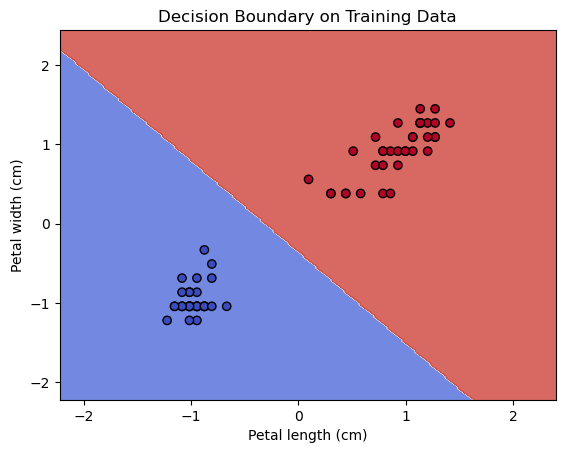

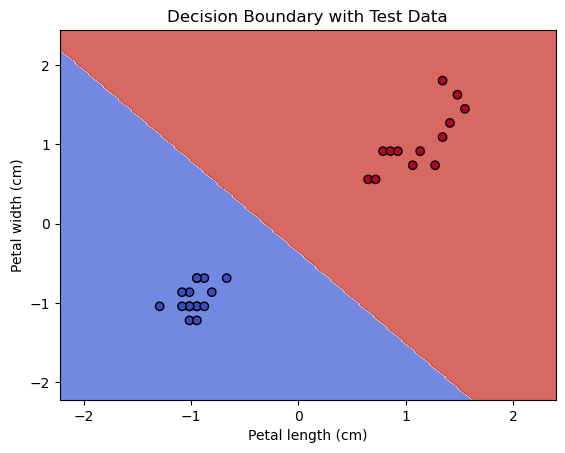

In [15]:
#Task 1a and 1b
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Loading the Iris dataset
iris = datasets.load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target

# Selecting only 'setosa' and 'versicolor' classes
X = X[y != 2]
y = y[y != 2]

# Normalizing the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Training (LinearSVC)
model = LinearSVC()
model.fit(X_train, y_train)

# Plotting the decision boundary on the training data
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plotting the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision Boundary on Training Data')
plt.show()

# Plot the decision boundary along with the test data
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision Boundary with Test Data')
plt.show()
